# Classification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pycaret.datasets import get_data
from pycaret.classification import *
mpl.rcParams['figure.dpi'] = 300

### Loading the Dataset

In [116]:
data = get_data('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Exploratory Data Analysis

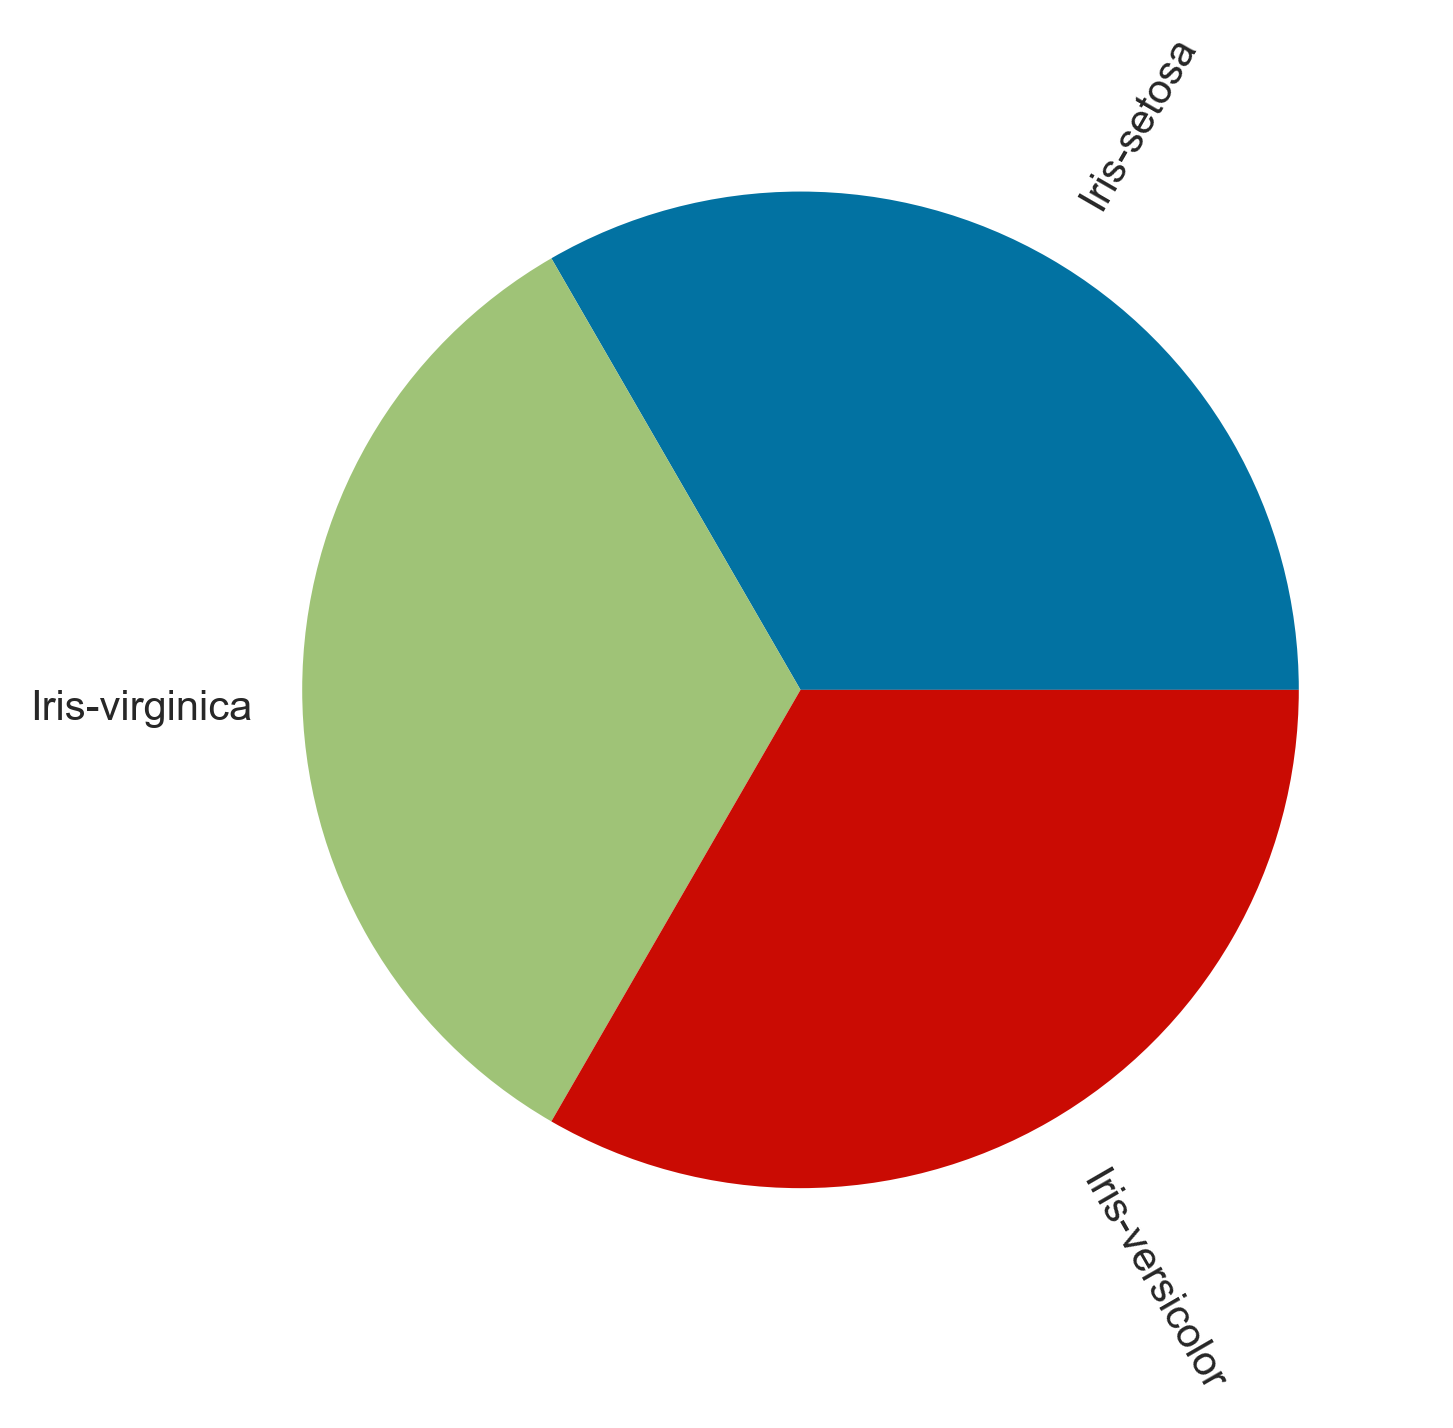

In [147]:
data['species'].value_counts().plot(kind='pie', rotatelabels=True)
plt.ylabel('')
plt.show()

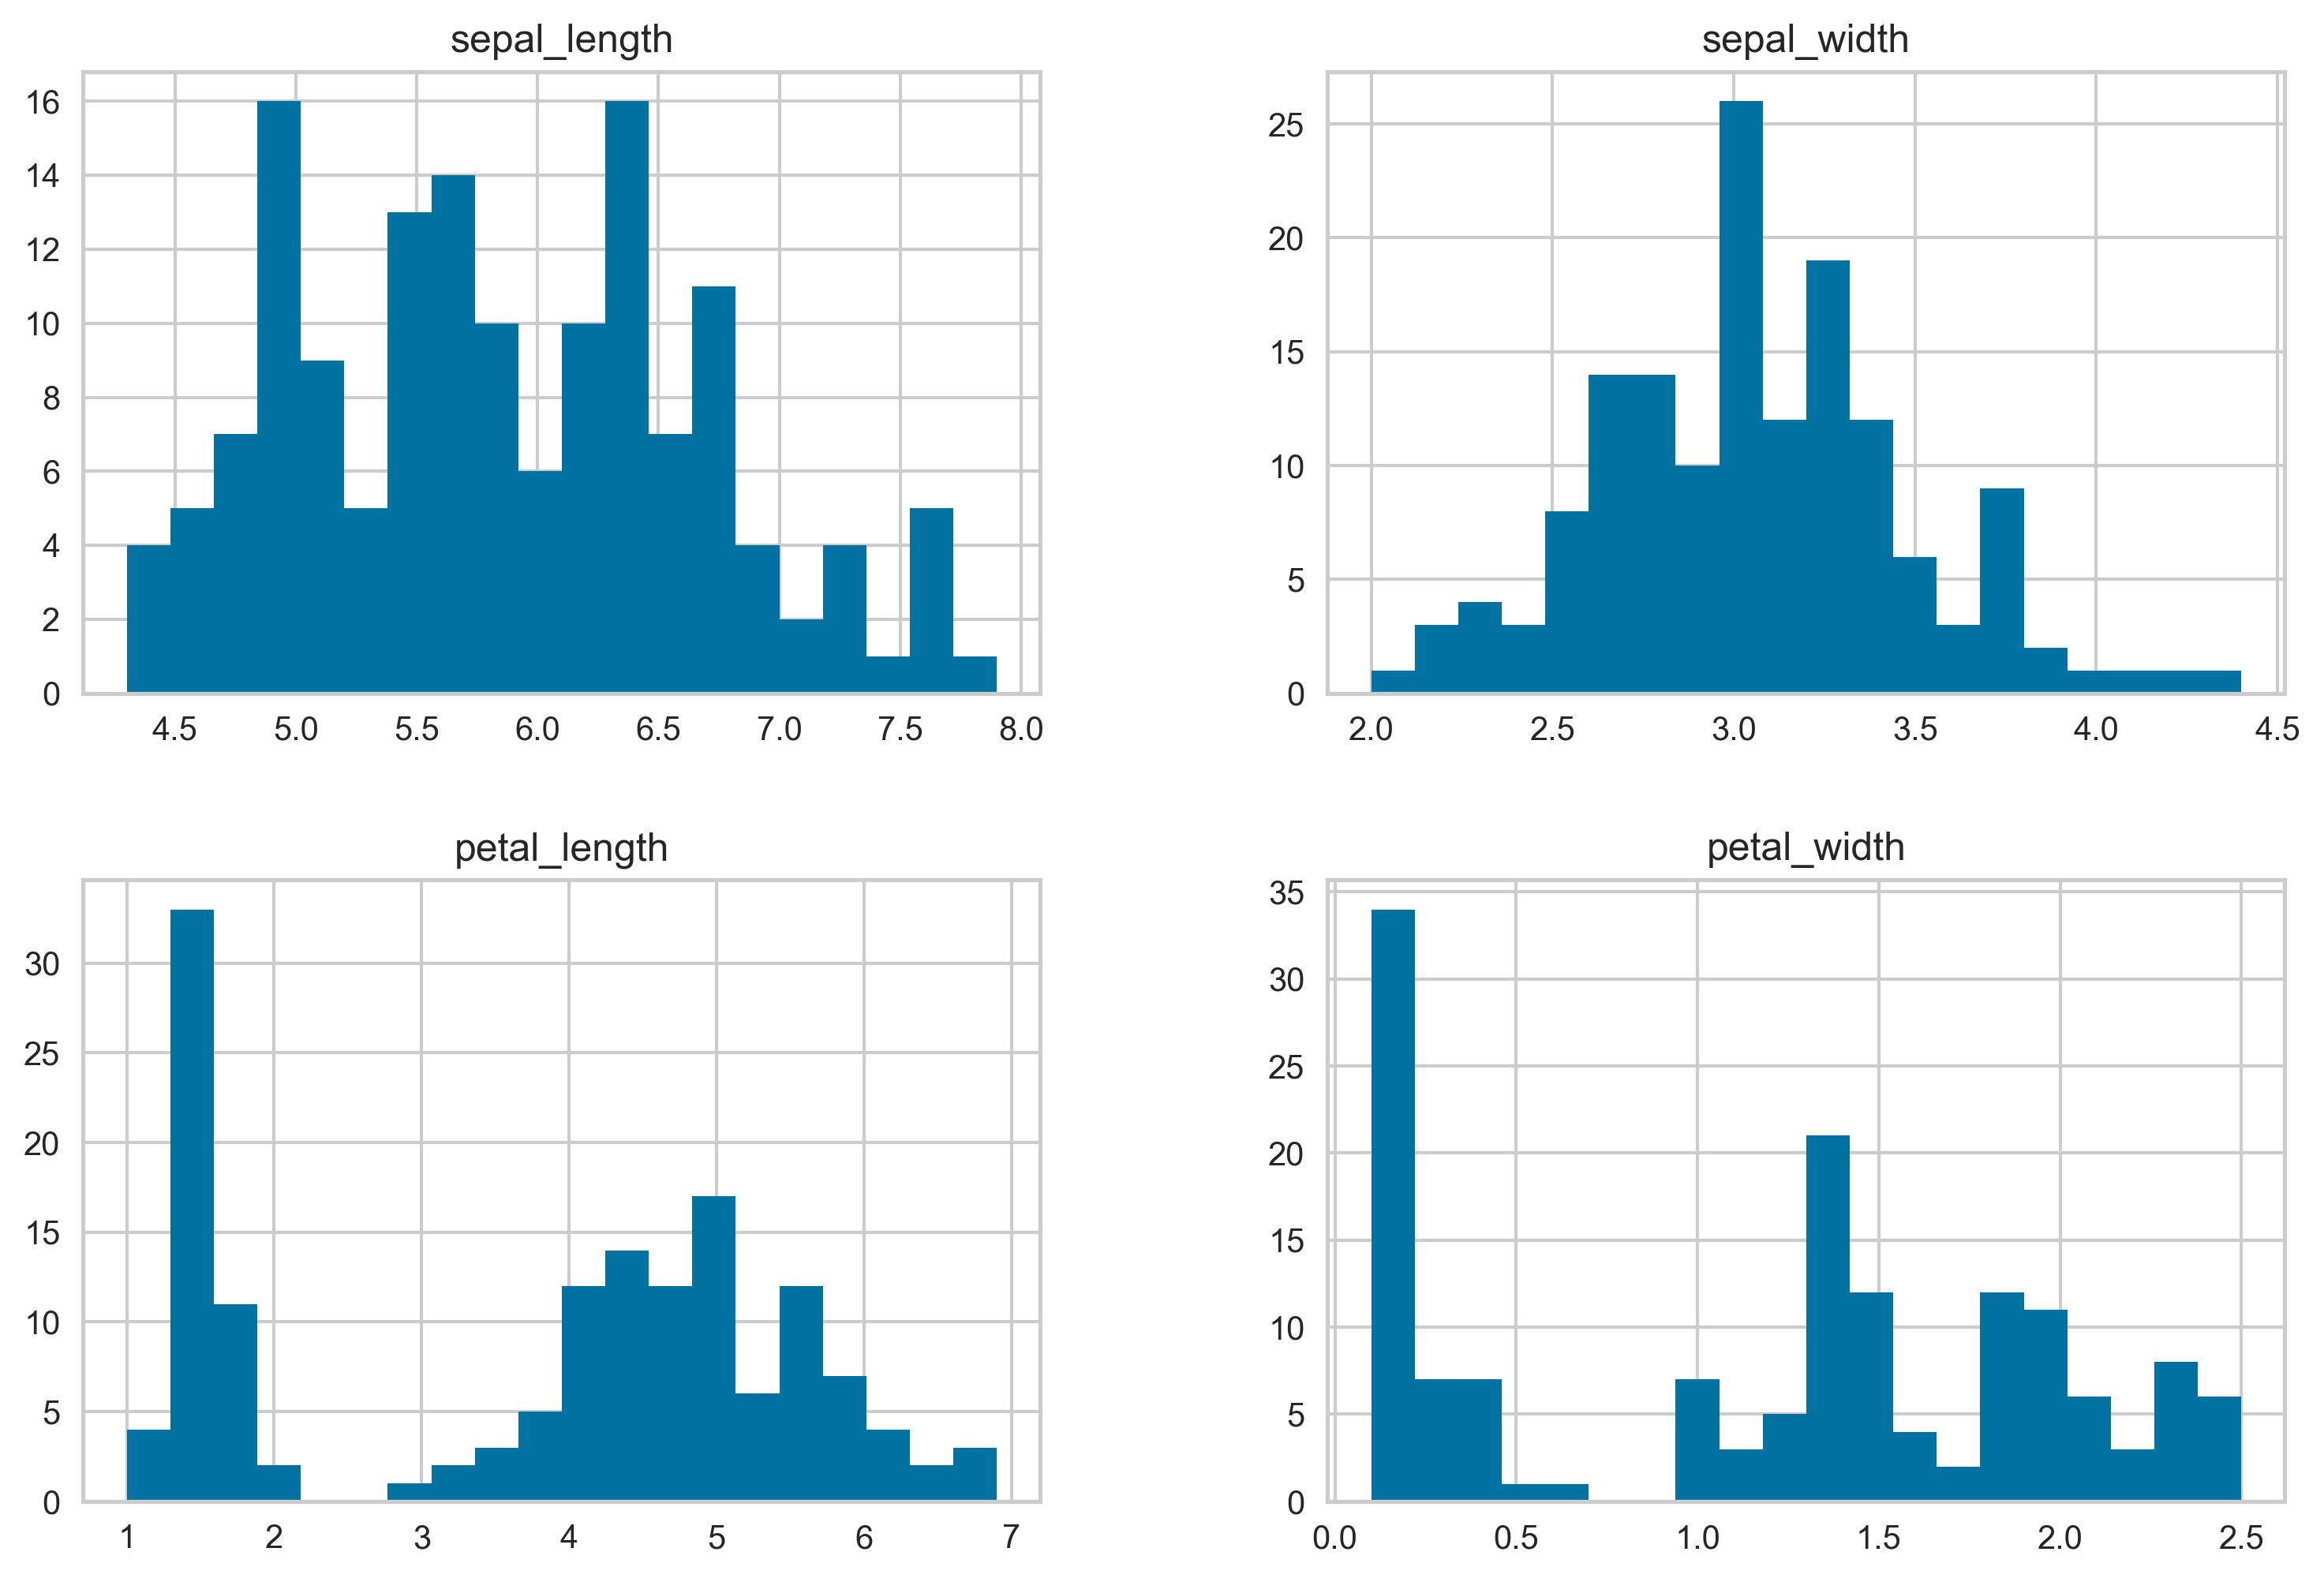

In [118]:
data.hist(bins=20, figsize = (12,8))
plt.show()

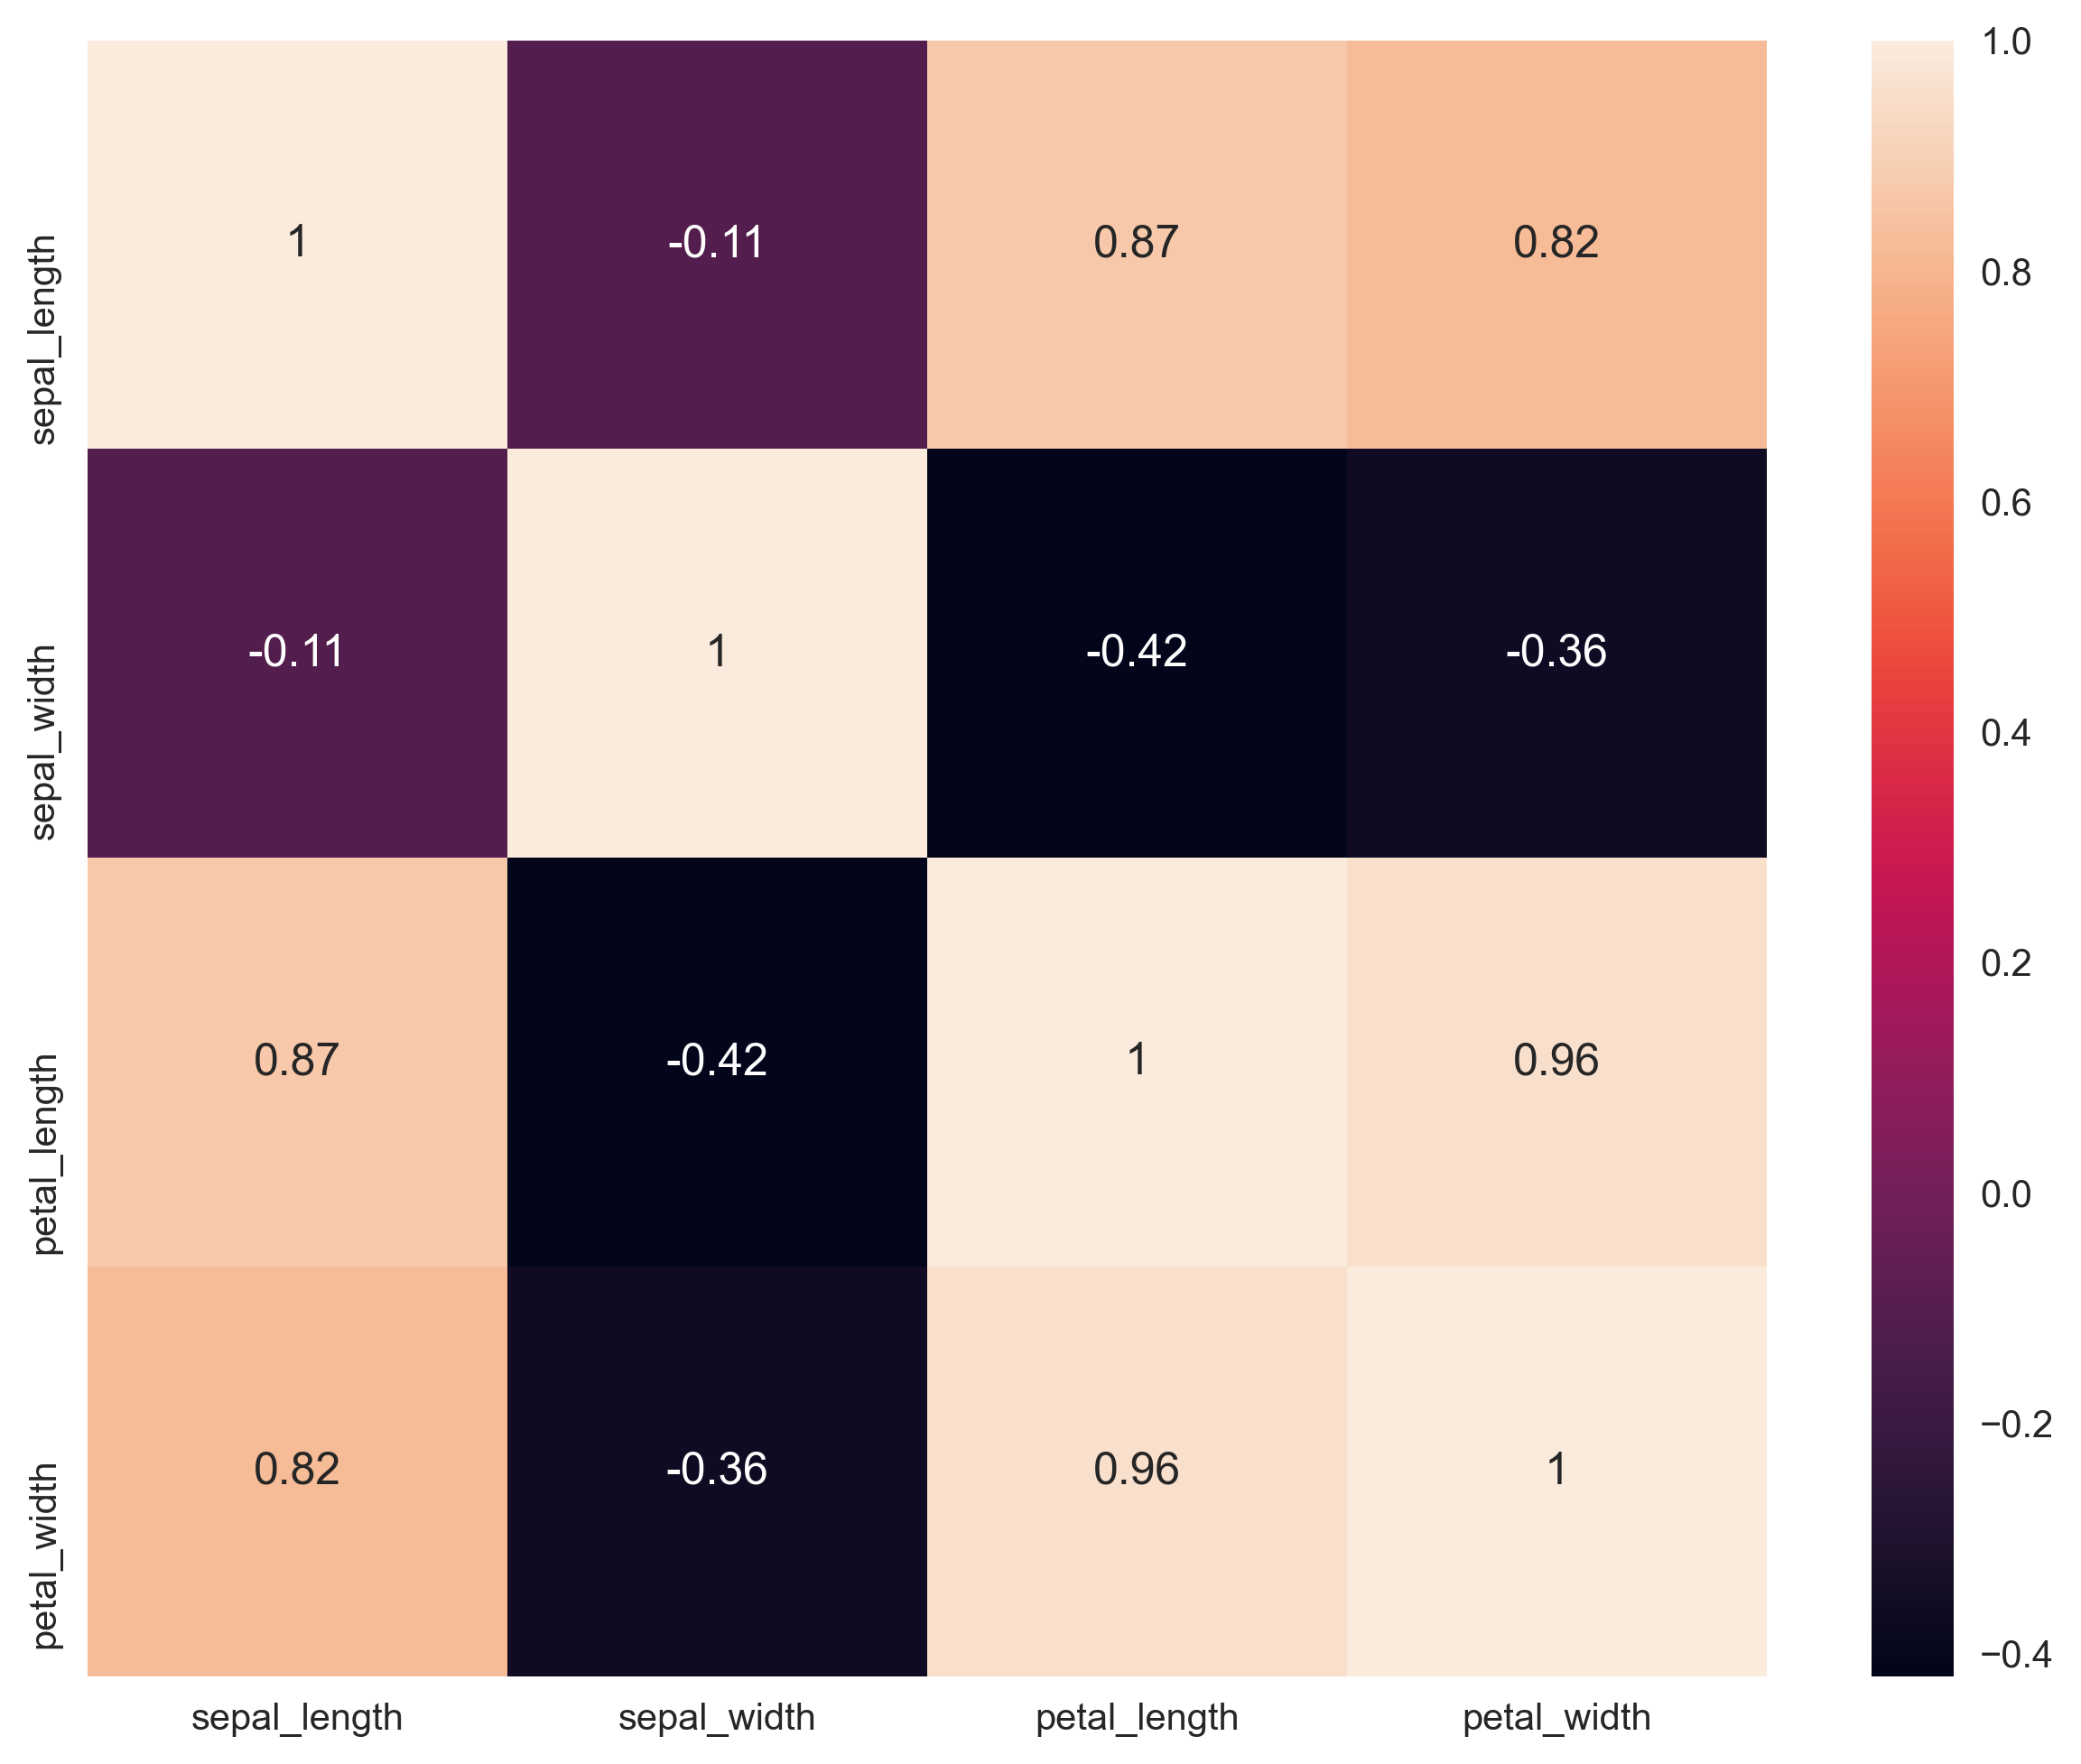

In [119]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr().round(decimals=2), annot=True)
plt.show()

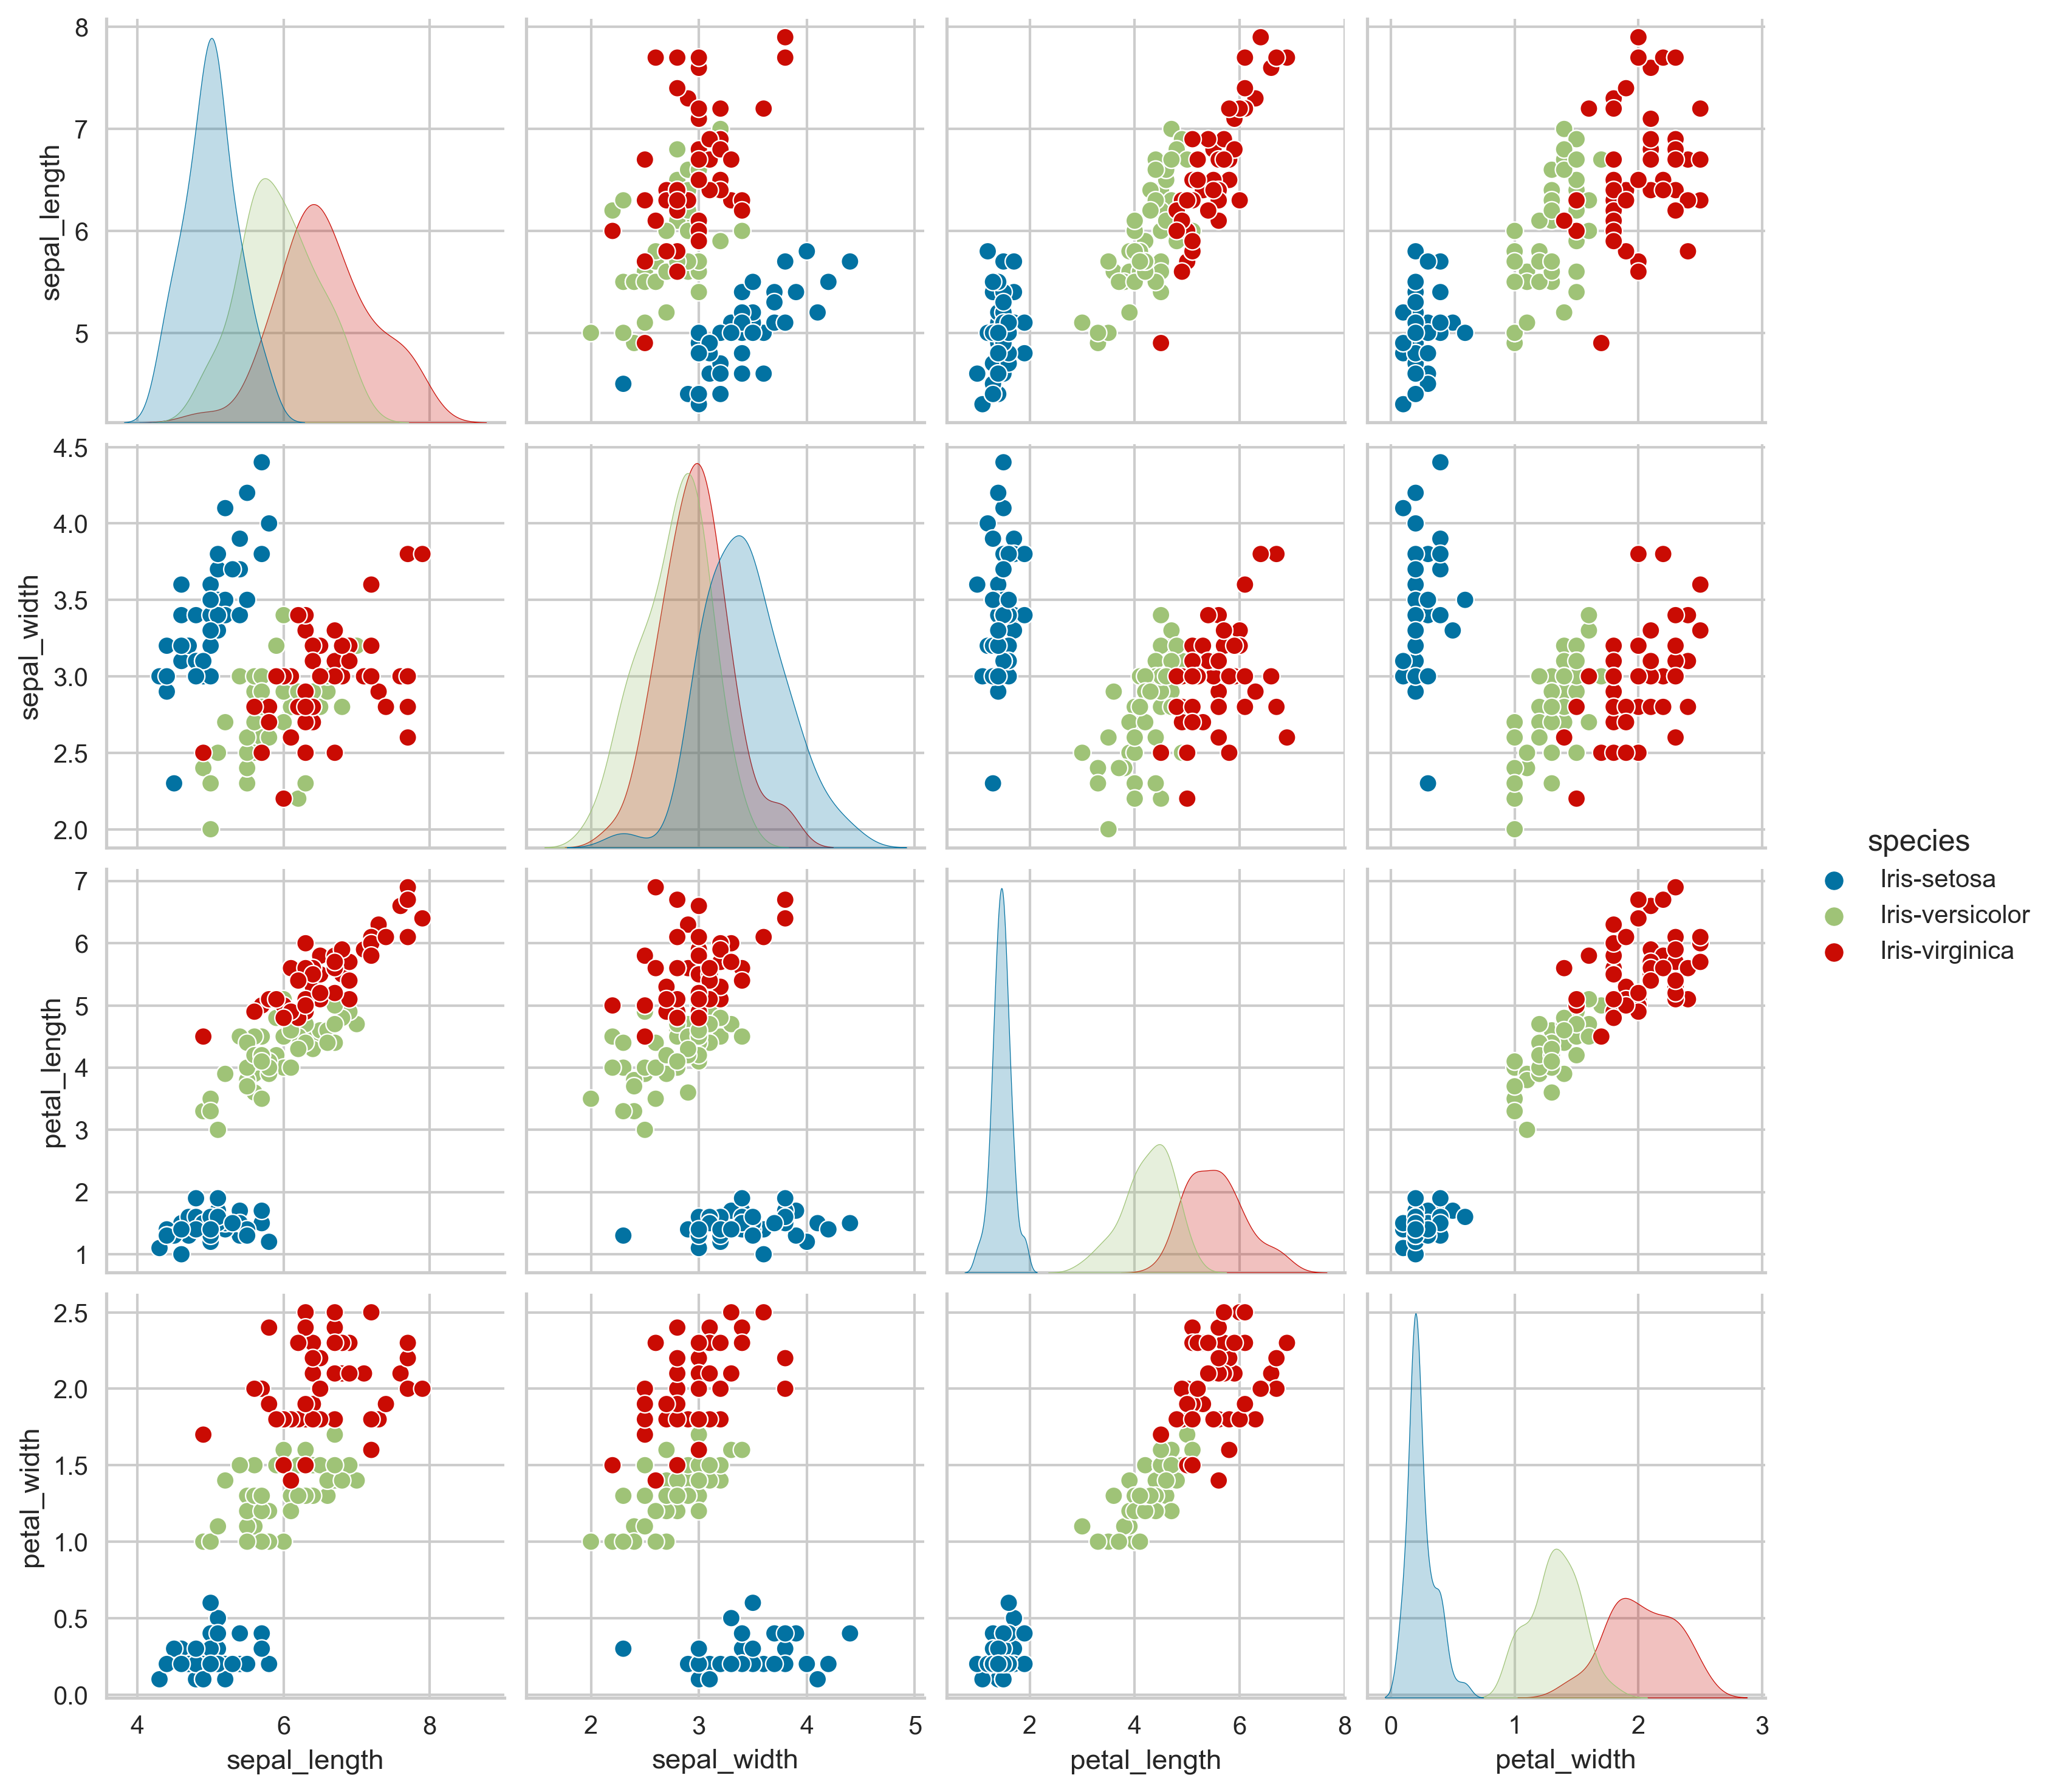

In [120]:
sns.pairplot(data, hue='species')
plt.show()

### Initializing the PyCaret Environment

In [121]:
classf = setup(data=data, target='species', train_size = 0.8)

,Description,Value
0,session_id,5858
1,Target,species
2,Target Type,Multiclass
3,Label Encoded,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original Data,"(150, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [122]:
get_config('X').head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Comparing Classification Models

In [45]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9833,0.9938,0.9833,0.9867,0.9831,0.9750,0.9769,0.3450
lda,Linear Discriminant Analysis,0.9833,1.0000,0.9833,0.9867,0.9831,0.9750,0.9769,0.0080
lr,Logistic Regression,0.9750,1.0000,0.9750,0.9800,0.9746,0.9625,0.9653,0.4970
qda,Quadratic Discriminant Analysis,0.9750,0.9979,0.9750,0.9800,0.9746,0.9625,0.9653,0.0080
et,Extra Trees Classifier,0.9667,1.0000,0.9667,0.9733,0.9661,0.9500,0.9537,0.0920
lightgbm,Light Gradient Boosting Machine,0.9667,0.9917,0.9667,0.9733,0.9661,0.9500,0.9537,0.0210
xgboost,Extreme Gradient Boosting,0.9583,0.9948,0.9583,0.9667,0.9577,0.9375,0.9421,0.0650
catboost,CatBoost Classifier,0.9583,1.0000,0.9583,0.9667,0.9577,0.9375,0.9421,0.5840
dt,Decision Tree Classifier,0.9500,0.9625,0.9500,0.9556,0.9492,0.9250,0.9284,0.0080
rf,Random Forest Classifier,0.9500,1.0000,0.9500,0.9622,0.9484,0.9250,0.9320,0.1040


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [46]:
model = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9167,1.0000,0.9167,0.9333,0.9153,0.8750,0.8843
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9167,0.9375,0.9167,0.9333,0.9153,0.8750,0.8843
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [62]:
params = {
        'n_neighbors':[5, 6, 7, 8, 9, 10],
        'leaf_size':[5, 10, 15, 20, 25, 30],
        'p':[1, 2, 3, 4, 5]
    }

tuned_model = tune_model(model, optimize = 'Accuracy', fold = 10,
                       custom_grid = params, n_iter = 100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9167,1.0000,0.9167,0.9333,0.9153,0.8750,0.8843
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [63]:
tuned_model

KNeighborsClassifier(algorithm='auto', leaf_size=5, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=3,
                     weights='uniform')